In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("fifa_data.csv")
df.shape

(18207, 89)

In [3]:
df = df.drop(['Unnamed: 0', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value',
              'Wage','Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
              'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height',
              'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
              'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GKDiving', 'GKHandling', 
              'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'], axis = 1)


In [4]:
df.shape
df.isnull().sum()

ID                  0
Name                0
Position           60
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

ID                 0
Name               0
Position           0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
dtype: int64

In [6]:
df['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [7]:
# Convert the current 27 positions into 4 main position disciplines, Attacker, Midfielder, Defender, Goalkeeper
att = dict.fromkeys(['ST', 'LW', 'RW', 'LS', 'RS', 'CF', 'RF', 'LF'], 'Attacker')
mid = dict.fromkeys(['CM', 'RM', 'LM', 'CAM', 'CDM', 'LCM', 'RCM', 'RDM', 'LDM', 'RAM', 'LAM'], 'Midfielder')
dfnc = dict.fromkeys(['CB', 'LB', 'RB', 'RCB', 'LCB', 'RWB', 'LWB'], 'Defender')
df.Position.replace('GK', 'Goalkeeper', inplace=True)
df.Position.replace(att, inplace=True)
df.Position.replace(mid, inplace=True)
df.Position.replace(dfnc, inplace=True)
df['Position'].value_counts()

Midfielder    6838
Defender      5866
Attacker      3418
Goalkeeper    2025
Name: Position, dtype: int64

In [8]:
# Check for duplicate players using the players unique player ID
df.duplicated('ID').sum()

0

In [9]:
# Nominate the features
feature_cols = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
                'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower',
                'Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision',
                'Penalties','Composure','Marking','StandingTackle','SlidingTackle']

# Assign the feature data
#X = df[feature_cols].copy().values
#print(X.shape)
X = df[feature_cols]
y = df['Position']
# Assign the outcomes
#y = df['Position'].copy().values
#print(y.shape)
print(X.shape)

(18147, 29)


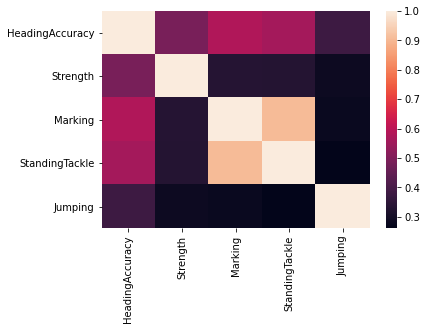

In [10]:
import seaborn as sns
testX = df[[ 'HeadingAccuracy','Strength','Marking','StandingTackle','Jumping']]
sns.heatmap(testX.corr());

In [11]:
def plot_train_time_curve(train_sizes, fit_times, title, alpha=0.1):
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    plt.plot(train_sizes, fit_times_mean, label='train points', color='blue', marker='o')
    plt.fill_between(train_sizes, fit_times_mean + fit_times_std,
                     fit_times_mean - fit_times_std, color='blue', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Training time')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [12]:
def plot_validation_curve(param_range, train_scores, test_scores, x_label, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='validation score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel(x_label)
    plt.ylabel('F1 score')
    plt.legend(loc='best')
    plt.show()



In [13]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='validation score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('F1 score')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()
    plt.savefig(title+".png")


In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector 

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=40)

std_scaler = StandardScaler()
cols = X_train.columns
X_train = pd.DataFrame(std_scaler.fit_transform(X_train), index=X_train.index, columns=cols)
X_test = pd.DataFrame(std_scaler.fit_transform(X_test), index=X_test.index, columns=cols)
print(X_train.shape)
print(X_test.shape)


(12702, 29)
(5445, 29)


# K-MEANS

In [300]:
from sklearn.cluster import KMeans
def k_means(data, range_n_clusters):
    inertias = []
    for n_cluster in range_n_clusters:
        kmeans = KMeans(n_clusters=n_cluster,random_state=40).fit(data)
        inertias.append(kmeans.inertia_)


    fig, ax = plt.subplots()
    ax.plot(range_n_clusters, inertias, 'o-')
    ax.grid()
    plt.xlabel("k")
    plt.ylabel("WCSS")
    plt.show()

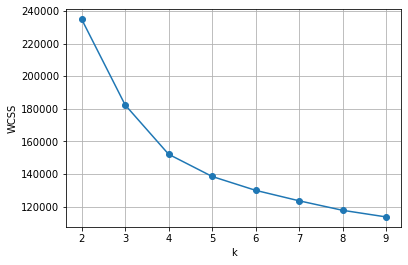

In [301]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_train,range_n_clusters)

# Silhouette

In [16]:
from sklearn.metrics import adjusted_mutual_info_score,davies_bouldin_score,calinski_harabasz_score
from sklearn.metrics import silhouette_samples, silhouette_score,accuracy_score,v_measure_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import KMeans
import time

def silhouette_analysis(data, range_n_clusters, algo_name):
    silhouette_scores=[]
    wall_clock_times=[]
    for n_cluster in range_n_clusters:
        start = time.time()
        if algo_name=="k-Means":
            clusterer = KMeans(n_clusters=n_cluster, random_state=40)
        elif algo_name=="GMM":
            clusterer = GaussianMixture(n_components=n_cluster,random_state=40,covariance_type="full")
        y_pred = clusterer.fit_predict(data)
        sil_coeff = silhouette_score(data, y_pred)
        ch_score = calinski_harabasz_score(data, y_pred)
        db_score = davies_bouldin_score(data, y_pred)
        silhouette_scores.append(sil_coeff)
        elapsed_time = time.time() - start
        wall_clock_times.append(elapsed_time)
        print("For n_clusters={}, The Silhouette Score is {}".format(n_cluster, sil_coeff))
        print("For n_clusters={}, The CH Score is {}".format(n_cluster, ch_score))
        print("For n_clusters={}, The DB Score is {}".format(n_cluster, db_score))
        #print("For n_clusters={}, Time elapsed {}".format(n_cluster, elapsed_time))
        #print("-----------------------------------------------------------------------------")
    return silhouette_scores,wall_clock_times

In [17]:
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score,accuracy_score,v_measure_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import KMeans

def ami_analysis(data, range_n_clusters, algo_name):
    ami_scores=[]
    wall_clock_times=[]
    for n_cluster in range_n_clusters:
        start = time.time()
        if algo_name=="k-Means":
            clusterer = KMeans(n_clusters=n_cluster, random_state=40)
        elif algo_name=="GMM":
            clusterer = GaussianMixture(n_components=n_cluster,random_state=40,covariance_type="full")
        y_pred = clusterer.fit_predict(data)
        ami_score = adjusted_mutual_info_score(y_train, y_pred)
        ami_scores.append(ami_score)
        elapsed_time = time.time() - start
        wall_clock_times.append(elapsed_time)
        #print("For n_clusters={}, The Adjusted MI Score is {}".format(n_cluster, ami_score))
        #print("For n_clusters={}, Time elapsed {}".format(n_cluster, elapsed_time))
        #print("-----------------------------------------------------------------------------")
    return ami_scores,wall_clock_times

In [18]:
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score,accuracy_score,v_measure_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import KMeans

def silhouette_ami_plot(data, range_n_clusters, algo_name):
    silhouette_scores,times_elapsed = silhouette_analysis(data, range_n_clusters, algo_name)
    ami_scores = ami_analysis(data, range_n_clusters, algo_name)
    # plotting the scores against the value of k
    plt.plot(range_n_clusters, silhouette_scores, 'o-', label='Silhouette')
    plt.plot(range_n_clusters, ami_scores, 'o-', label='AMI-Score')
    #plt.plot(range_n_clusters, times_elapsed, 'o-', label='Wall Clock Time')
    plt.xlabel('k')
    plt.ylabel('Scores')
    plt.legend(loc=4)
    plt.show()
    

In [19]:
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score,accuracy_score,v_measure_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import KMeans

def silhouette_time_plot(data, range_n_clusters, algo_name):
    silhouette_scores,times_elapsed = silhouette_analysis(data, range_n_clusters, algo_name)
    #ami_scores = ami_analysis(data, range_n_clusters, algo_name)
    # plotting the scores against the value of k
    #plt.plot(range_n_clusters, silhouette_scores, 'o-', label='Silhouette')
    #plt.plot(range_n_clusters, ami_scores, 'o-', label='AMI-Score')
    plt.plot(range_n_clusters, times_elapsed, 'o-', label='Wall Clock Time')
    plt.xlabel('k')
    plt.ylabel('Scores')
    plt.legend(loc=4)
    plt.show()

For n_clusters=2, The Silhouette Score is 0.4522963525902506
For n_clusters=2, The CH Score is 7208.582366461359
For n_clusters=2, The DB Score is 0.790677269858946
For n_clusters=3, The Silhouette Score is 0.2522436533373158
For n_clusters=3, The CH Score is 6473.0178875857855
For n_clusters=3, The DB Score is 1.3537893175582616
For n_clusters=4, The Silhouette Score is 0.24769635501746343
For n_clusters=4, The CH Score is 6014.199456365943
For n_clusters=4, The DB Score is 1.3549978954195288
For n_clusters=5, The Silhouette Score is 0.22504234234783832
For n_clusters=5, The CH Score is 5265.883193755908
For n_clusters=5, The DB Score is 1.4565135207202693
For n_clusters=6, The Silhouette Score is 0.1961561159558182
For n_clusters=6, The CH Score is 4654.057793659416
For n_clusters=6, The DB Score is 1.5807411033255747
For n_clusters=7, The Silhouette Score is 0.19171011669205212
For n_clusters=7, The CH Score is 4189.514629749206
For n_clusters=7, The DB Score is 1.608401099092004
Fo

ValueError: x and y must have same first dimension, but have shapes (8,) and (2, 8)

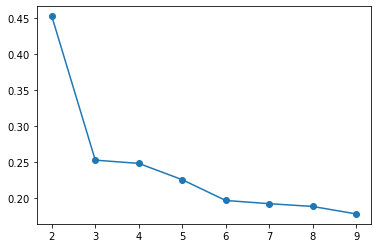

In [20]:
range_n_clusters=list(range(2, 10, 1))
silhouette_ami_plot(X_train,range_n_clusters,"k-Means")

For n_clusters=2, Time elapsed 1.7950260639190674
-----------------------------------------------------------------------------
For n_clusters=3, Time elapsed 1.6548261642456055
-----------------------------------------------------------------------------
For n_clusters=4, Time elapsed 1.662970781326294
-----------------------------------------------------------------------------
For n_clusters=5, Time elapsed 2.148728609085083
-----------------------------------------------------------------------------
For n_clusters=6, Time elapsed 2.5482089519500732
-----------------------------------------------------------------------------
For n_clusters=7, Time elapsed 2.497083902359009
-----------------------------------------------------------------------------
For n_clusters=8, Time elapsed 2.594719886779785
-----------------------------------------------------------------------------
For n_clusters=9, Time elapsed 2.5823190212249756
----------------------------------------------------------

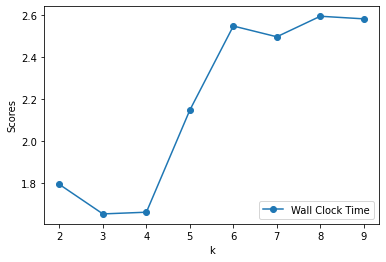

In [144]:
range_n_clusters=list(range(2, 10, 1))
silhouette_time_plot(X_train,range_n_clusters,"k-Means")

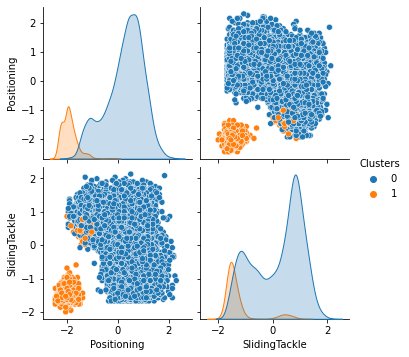

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=40).fit(X_train)
y_pred = kmeans.fit_predict(X_train)
import seaborn as sns
kmeansDf = pd.DataFrame(X_train)
kmeansDf['Clusters']=y_pred
#print(kmeansDf.head())
cols_to_plot = kmeansDf.columns[[22,28]].tolist() + ['Clusters']
sns.pairplot(kmeansDf[cols_to_plot], hue='Clusters')
plt.show()

# EMM

In [122]:
from sklearn.mixture import GaussianMixture
def bic_analysis(data,n_components):
    bic_scores=[]
    wall_clock_times=[]
    for n_cluster in n_components:
        start = time.time()
        clusterer = GaussianMixture(n_components=n_cluster,random_state=40,covariance_type="full")
        clusterer.fit(data)
        bic_score = clusterer.bic(data)
        bic_scores.append(np.abs(bic_score))
        elapsed_time = time.time() - start
        wall_clock_times.append(elapsed_time)
        #print("For n_components={}, The BIC Score is {}".format(n_cluster, bic_score))
        #print("-----------------------------------------------------------------------------")
    return bic_scores,wall_clock_times

In [327]:
from sklearn.mixture import GaussianMixture
def bic_plot(data,n_components):
    bic_scores=bic_analysis(data,n_components)
    plt.plot(n_components, bic_scores, 'o-', label='BIC')
    plt.xlabel('Components')
    plt.ylabel('Scores')
    plt.legend(loc=4)
    plt.show()

For n_components=1, The BIC Score is 515353.21160813764
-----------------------------------------------------------------------------
For n_components=2, The BIC Score is 471619.2613167388
-----------------------------------------------------------------------------
For n_components=3, The BIC Score is 435550.40430550405
-----------------------------------------------------------------------------
For n_components=4, The BIC Score is 427600.4496585416
-----------------------------------------------------------------------------
For n_components=5, The BIC Score is 425503.867388988
-----------------------------------------------------------------------------
For n_components=6, The BIC Score is 422299.44943107624
-----------------------------------------------------------------------------
For n_components=7, The BIC Score is 419377.46772406984
-----------------------------------------------------------------------------
For n_components=8, The BIC Score is 420189.1415633072
-----------

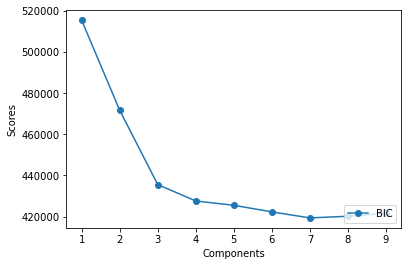

In [328]:
n_components = np.arange(1, 10)
bic_plot(X_train,n_components)

In [332]:
from sklearn.mixture import GaussianMixture
def gmm_ami_plot(data,n_components):
    ami_scores = ami_analysis(data, n_components, "GMM")
    plt.plot(n_components, ami_scores, 'o-', label='AMI-Score')
    plt.xlabel('Components')
    plt.ylabel('Scores')
    plt.legend(loc=4)
    plt.show()

For n_clusters=1, The Adjusted MI Score is 5.654622289188097e-15
-----------------------------------------------------------------------------
For n_clusters=2, The Adjusted MI Score is 0.3473779973959709
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.5984990721668982
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.5773482830549502
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.5168703755519957
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.475762625431824
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.5113514711234775
-----------------------------------------------------------------------------
For n_clusters=8, 

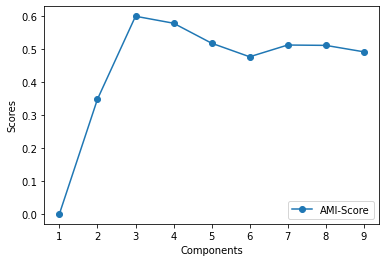

In [333]:
n_components = np.arange(1, 10)
gmm_ami_plot(X_train,n_components)

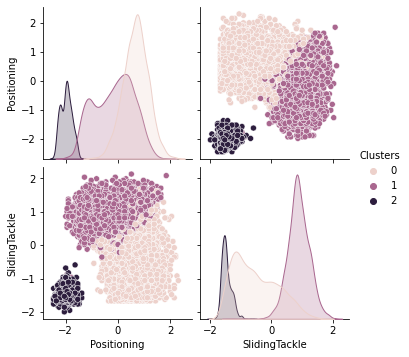

In [68]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(3, covariance_type='full', random_state=40)
y_pred = gmm.fit_predict(X_train)
import seaborn as sns
kmeansDf = pd.DataFrame(X_train)
kmeansDf['Clusters']=y_pred
#print(kmeansDf.head())
cols_to_plot = kmeansDf.columns[[22,28]].tolist() + ['Clusters']
sns.pairplot(kmeansDf[cols_to_plot], hue='Clusters')
plt.show()

# PCA

In [334]:
def biplot(score,coeff,variables=None,targets=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    classes = np.unique(targets)
    colors = ['b','silver','y','g']
    for s,l in enumerate(classes):
        plt.scatter(xs[targets==l]* scalex,ys[targets==l] * scaley,s=10, c = colors[s], marker='o') # color based on group
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if variables is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, variables[i], color = 'black', ha = 'center', va = 'center')
 
    plt.xlabel("Component {}".format(1))
    plt.ylabel("Component {}".format(2))
    plt.grid()




In [390]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=40)
X_pca_2d=pca.fit_transform(X_train)
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.53592447 0.16526937]
Total Variance Explained: 70.12


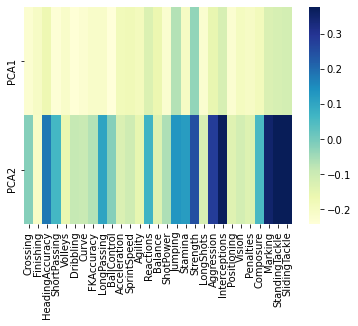

In [336]:
import seaborn as sns
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=pd.DataFrame(X_train).columns.values,
                 cbar_kws={"orientation": "vertical"})


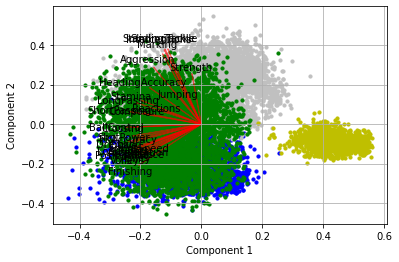

In [337]:
biplot(X_pca_2d[:,0:2],np.transpose(pca.components_[0:2, :]),pd.DataFrame(X_train).columns.values,y_train)
plt.show()

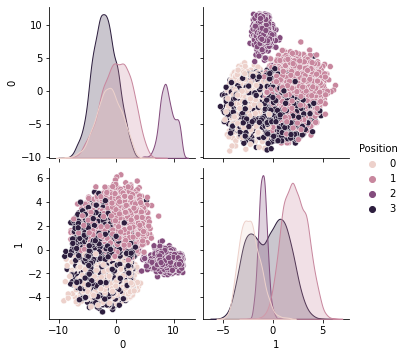

In [38]:
import seaborn as sns
pcaDf = pd.DataFrame(X_pca_2d)
pcaDf['Position']=y_train
sns.pairplot(pcaDf, hue='Position')
plt.show()

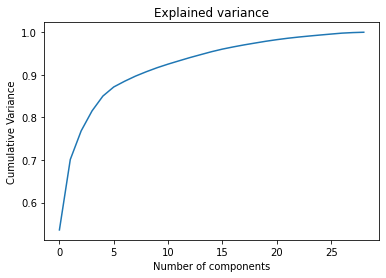

In [389]:
from sklearn.decomposition import PCA
#fitting the pca algorithm with our data
pca=PCA(random_state=40).fit(X_train)
#plotting the cumulative summation of the explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance')
plt.title('Explained variance')
plt.show()

In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_pca=pca.fit_transform(X_train)
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))


Variance of each component: [0.53592447 0.16526937 0.06720126 0.04689042 0.03487959 0.02139432
 0.0134063  0.0120462  0.01035519 0.0094729  0.00835482 0.00770205
 0.00757612 0.006982   0.00690911]
Total Variance Explained: 95.44


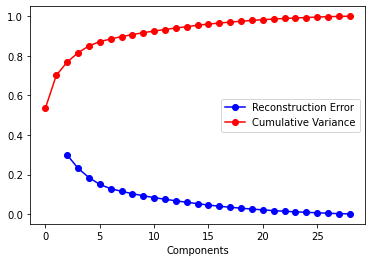

<Figure size 432x288 with 0 Axes>

In [39]:
from sklearn.decomposition import PCA
dims_fifa = list(range(2, 29, 1))
reconstruction_error=[]
for dim in dims_fifa:
    pca = PCA(n_components=dim, random_state=40)
    x_prime = pca.fit_transform(X_train)
    
    A = np.linalg.pinv(pca.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X_train, reconstructed)  
    reconstruction_error.append(rc_err)
        
plt.plot(dims_fifa,reconstruction_error, label='Reconstruction Error', color='b', marker='o')
pca1=PCA(random_state=40).fit(X_train)
#plotting the cumulative summation of the explained variance

plt.plot(np.cumsum(pca1.explained_variance_ratio_),label='Cumulative Variance', color='r', marker='o')
plt.xlabel('Components')
plt.legend(loc='best')
plt.figure()
plt.show()

# PCA k-Means

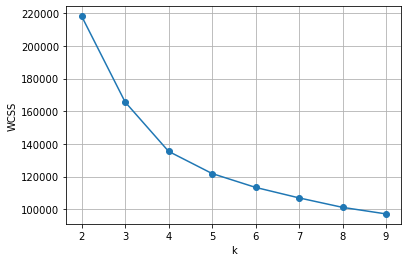

In [245]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_pca,range_n_clusters)

For n_clusters=2, The Silhouette Score is 0.4689009924679623
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.2689069752920844
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.26713065366916033
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.244787397270714
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.21559712839336326
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.2106333378268208
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.20769942168112482
-----------------------------------------------------------------------------
For n_clusters=9, The Sil

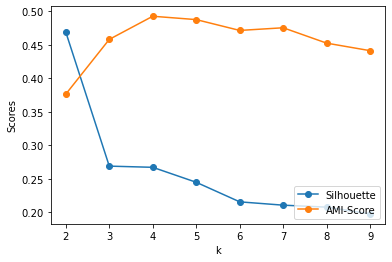

In [340]:
range_n_clusters=list(range(2, 10, 1))
silhouette_ami_plot(X_pca,range_n_clusters,"k-Means")

For n_clusters=2, Time elapsed 1.7818386554718018
-----------------------------------------------------------------------------
For n_clusters=3, Time elapsed 1.7830150127410889
-----------------------------------------------------------------------------
For n_clusters=4, Time elapsed 1.6056058406829834
-----------------------------------------------------------------------------
For n_clusters=5, Time elapsed 1.6785123348236084
-----------------------------------------------------------------------------
For n_clusters=6, Time elapsed 1.6912364959716797
-----------------------------------------------------------------------------
For n_clusters=7, Time elapsed 2.1186838150024414
-----------------------------------------------------------------------------
For n_clusters=8, Time elapsed 2.5827903747558594
-----------------------------------------------------------------------------
For n_clusters=9, Time elapsed 2.5475540161132812
------------------------------------------------------

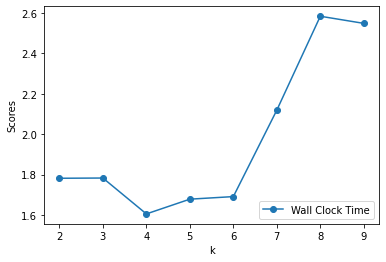

In [145]:
range_n_clusters=list(range(2, 10, 1))
silhouette_time_plot(X_pca,range_n_clusters,"k-Means")

# PCA EMM

For n_components=1, The BIC Score is 449128.0496612198
-----------------------------------------------------------------------------
For n_components=2, The BIC Score is 416989.17483969143
-----------------------------------------------------------------------------
For n_components=3, The BIC Score is 393268.5478422573
-----------------------------------------------------------------------------
For n_components=4, The BIC Score is 388948.2952587124
-----------------------------------------------------------------------------
For n_components=5, The BIC Score is 388289.00714411447
-----------------------------------------------------------------------------
For n_components=6, The BIC Score is 385859.12344287924
-----------------------------------------------------------------------------
For n_components=7, The BIC Score is 383554.4613721087
-----------------------------------------------------------------------------
For n_components=8, The BIC Score is 383706.2164492074
-----------

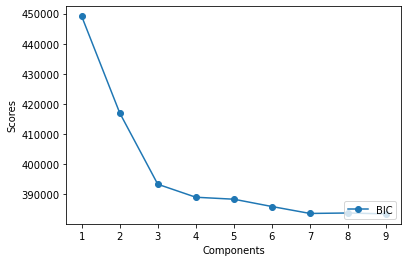

In [341]:
n_components = np.arange(1, 10)
bic_plot(X_pca,n_components)

For n_clusters=1, The Adjusted MI Score is 5.654622289188097e-15
-----------------------------------------------------------------------------
For n_clusters=2, The Adjusted MI Score is 0.37878738927267225
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.6041241231174403
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.6078410750884946
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.5168666699990695
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.5063941369997369
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.5205777982645668
-----------------------------------------------------------------------------
For n_clusters=8

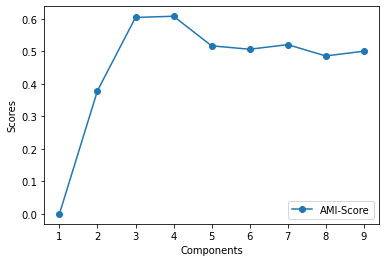

In [342]:
n_components = np.arange(1, 10)
gmm_ami_plot(X_pca,n_components)

# ICA

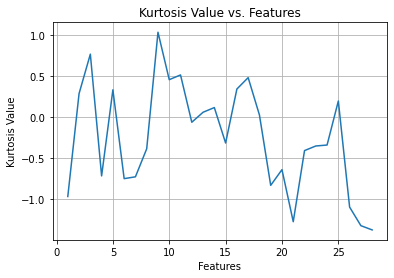

In [150]:
testDf=pd.DataFrame(X_train)
kurtosis_values = []
dims_fifa = list(range(1, 29, 1))
features=[]
for i in dims_fifa:
    kur = scipy.stats.kurtosis(testDf[i])
    kurtosis_values.append(kur)
    if kur>0.5 or kur<-.5:
        features.append(i)
kurtosis_values = np.array(kurtosis_values)
plt.plot(dims_fifa,kurtosis_values)
plt.xlabel('Features')
plt.ylabel('Kurtosis Value')
plt.title('Kurtosis Value vs. Features')
plt.grid()
plt.show()
#print(testDf.kurtosis())

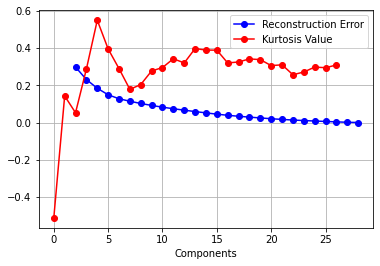

In [41]:
import scipy.stats
from sklearn.decomposition import FastICA
kurtosis_values = []
dims_fifa = list(range(2, 29, 1))
for i in dims_fifa:
    fast_ica = FastICA(n_components = i,random_state=40,max_iter=1000,tol=.001)
    data_ica = fast_ica.fit_transform(X_train)
    #print(fast_ica.components_)
    kur = scipy.stats.kurtosis(fast_ica.components_.transpose())
    #kur = scipy.stats.kurtosis(data_ica)
    #print(kur)
    kurtosis_values.append(np.mean(kur)/i)
kurtosis_values = np.array(kurtosis_values)


from sklearn.decomposition import FastICA
reconstruction_error=[]
dims_fifa = list(range(2, 29, 1))
for dim in dims_fifa:
    fast_ica = FastICA(n_components = dim,random_state=40,max_iter=1000,tol=.001)
    x_prime = fast_ica.fit_transform(X_train)
    
    A = np.linalg.pinv(fast_ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X_train, reconstructed)    
    reconstruction_error.append(rc_err)   

plt.plot(dims_fifa,reconstruction_error, label='Reconstruction Error', color='b', marker='o')
#plt.ylabel('Reconstruction Error')
#plt.show()
plt.plot(kurtosis_values,label='Kurtosis Value', color='r', marker='o')
plt.xlabel('Components')
#plt.ylabel('Normalized Mean Kurtosis Value')
plt.legend(loc='best')
plt.grid()
plt.show()

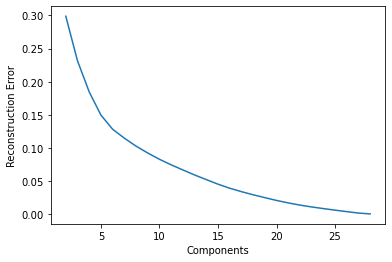

In [33]:
from sklearn.decomposition import FastICA
reconstruction_error=[]
dims_fifa = list(range(2, 29, 1))
for dim in dims_fifa:
    fast_ica = FastICA(n_components = dim,random_state=40,max_iter=1000,tol=.001)
    x_prime = fast_ica.fit_transform(X_train)
    
    A = np.linalg.pinv(fast_ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X_train, reconstructed)    
    reconstruction_error.append(rc_err)   

plt.plot(dims_fifa,reconstruction_error)
plt.xlabel('Components')
plt.ylabel('Reconstruction Error')
plt.show()

In [19]:
from sklearn.decomposition import FastICA
fast_ica = FastICA(n_components=6, random_state=40,max_iter=1000,tol=.001)
X_ica=fast_ica.fit_transform(X_train)


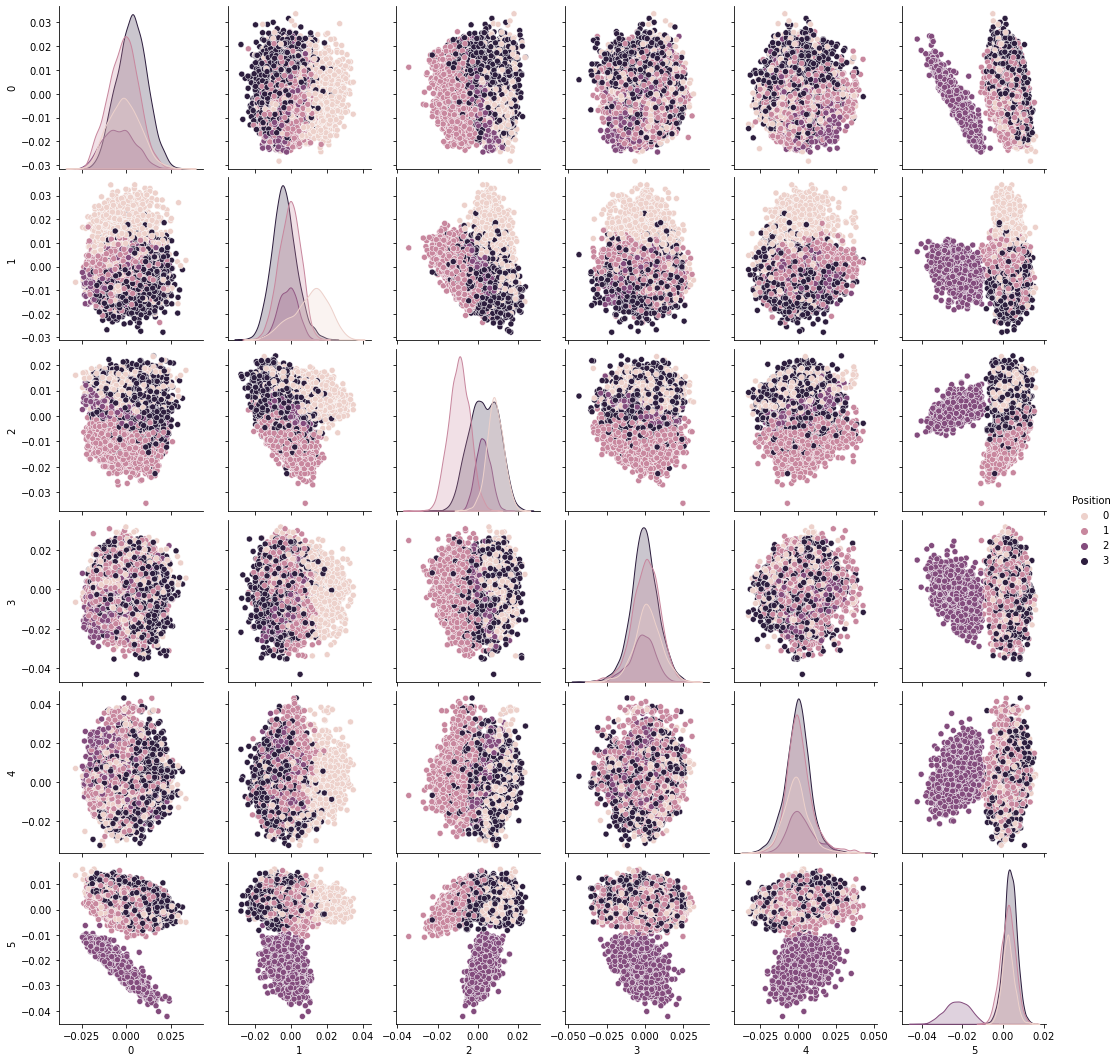

In [253]:
import seaborn as sns
icaDf = pd.DataFrame(X_ica)
icaDf['Position']=y_train
sns.pairplot(icaDf, hue='Position')
plt.show()

(29, 6)
(29,)
[2.09383771 0.15336373 0.01913057 0.         0.06052784 0.64964207]


<AxesSubplot:>

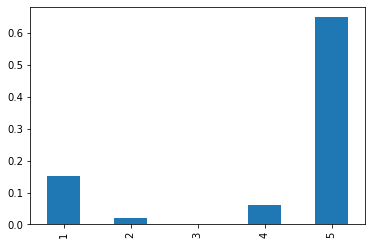

In [45]:
#print(fast_ica.components_.shape)
from sklearn.feature_selection import mutual_info_regression,f_regression
print(fast_ica.components_.T.shape)
print(fast_ica.components_[0].shape)

mi = mutual_info_regression(fast_ica.components_.T, fast_ica.components_[0])
print(mi)
pd_mi= pd.Series(mi[1:6])
pd_mi.index=list(range(1,6))
pd_mi.plot.bar()


In [36]:
np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)
print(y.shape)
print(X.shape)
print(X.T[0].shape)
mi = mutual_info_regression(X, y)
mi /= np.max(mi)
print(mi)

(1000,)
(1000, 3)
(1000,)
[0.36448455 1.         0.        ]


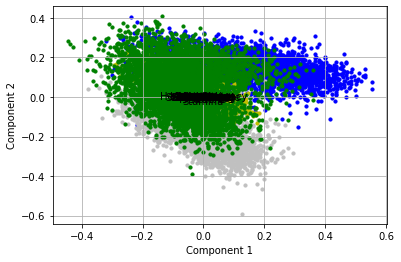

In [497]:
biplot(X_ica[:,1:3],np.transpose(fast_ica.components_[1:3, :]),pd.DataFrame(X_train).columns.values,y_train)
plt.show()

# ICA k-Means

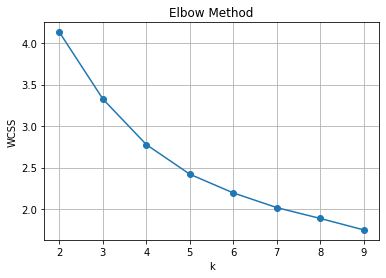

In [293]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_ica,range_n_clusters)

For n_clusters=2, The Silhouette Score is 0.1706188988343536
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.2123403180893148
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.20426454174092265
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.2001645845042247
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.19486748958459604
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.18856569366552467
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.18865825822622675
-----------------------------------------------------------------------------
For n_clusters=9, The S

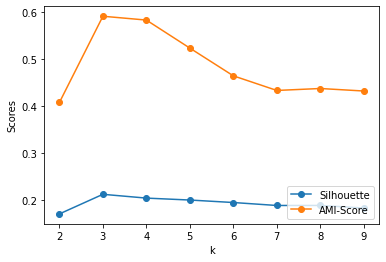

In [351]:
range_n_clusters=list(range(2, 10, 1))
silhouette_ami_plot(X_ica,range_n_clusters,"k-Means")

# ICA EMM

For n_components=1, The BIC Score is -503624.94811210135
-----------------------------------------------------------------------------
For n_components=2, The BIC Score is -526134.9922111753
-----------------------------------------------------------------------------
For n_components=3, The BIC Score is -540947.0515760534
-----------------------------------------------------------------------------
For n_components=4, The BIC Score is -542541.7555356771
-----------------------------------------------------------------------------
For n_components=5, The BIC Score is -543405.6054602453
-----------------------------------------------------------------------------
For n_components=6, The BIC Score is -543701.2458389548
-----------------------------------------------------------------------------
For n_components=7, The BIC Score is -543871.4236622724
-----------------------------------------------------------------------------
For n_components=8, The BIC Score is -543943.6762158703
-----

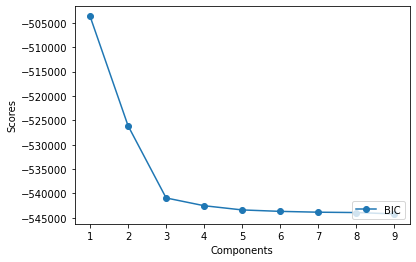

In [352]:
n_components = np.arange(1, 10)
bic_plot(X_ica,n_components)

For n_clusters=1, The Adjusted MI Score is 5.654622289188097e-15
-----------------------------------------------------------------------------
For n_clusters=2, The Adjusted MI Score is 0.3417482721667299
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.5899171365681943
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.6021017057386328
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.5532523133861925
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.5360954022732588
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.5085745062593944
-----------------------------------------------------------------------------
For n_clusters=8,

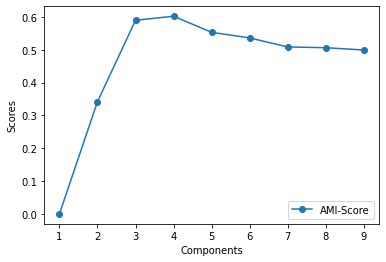

In [353]:
n_components = np.arange(1, 10)
gmm_ami_plot(X_ica,n_components)

# RP

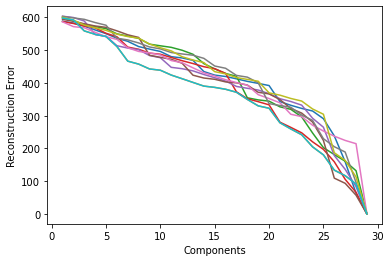

In [134]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
import random
dims_fifa = list(range(1, 30, 1))
reconstruction_error = []
from numpy.random import randint
random_seeds = randint(10, 100, 10)
for seed in random_seeds:
    mean_mse = []
    for dim in dims_fifa:
        grp = GaussianRandomProjection(random_state=seed,n_components=dim)
        X_prime = grp.fit_transform(X_train)
        W = grp.components_
        W_pinv = np.linalg.pinv(W).transpose()
        rec_data = np.dot(X_prime, W_pinv)
        dist = np.linalg.norm(X_train-rec_data)
        mean_mse.append(dist)

        #print(str(dim) +"-> "+str(dist))
    plt.plot(dims_fifa,mean_mse)
    #plt.fill_between(dims_fifa,reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
    plt.xlabel('Components')
    plt.ylabel('Reconstruction Error')
plt.show()

In [137]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
import random
dims_fifa = list(range(1, 29, 1))
from numpy.random import randint
random_seeds = randint(10, 100, 10)
for seed in random_seeds:
    reconstruction_error = []
    reconstruction_variance = []
    for dim in dims_fifa:
        mean_mse = []
        for j in range(0,100):
            grp = GaussianRandomProjection(random_state=seed,n_components=dim)
            X_prime = grp.fit_transform(X_train)
            W = grp.components_
            W_pinv = np.linalg.pinv(W).transpose()
            rec_data = np.dot(X_prime, W_pinv)
            dist = np.linalg.norm(X_train-rec_data)
            mean_mse.append(dist)

        reconstruction_variance.append(np.std(mean_mse))
        reconstruction_error.append(np.mean(mean_mse))

    reconstruction_error = np.array(reconstruction_error)
    plt.plot(dims_fifa,reconstruction_error)
    plt.fill_between(dims_fifa,reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
    plt.xlabel('Components')
    plt.ylabel('Reconstruction Error')
plt.show()

KeyboardInterrupt: 

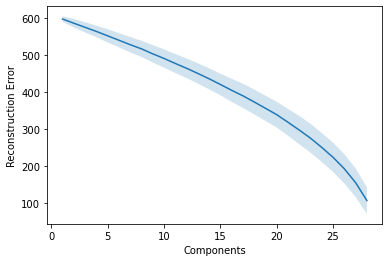

In [120]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
import random
dims_fifa = list(range(1, 29, 1))
reconstruction_error = []
reconstruction_variance = []
for dim in dims_fifa:
    mean_mse = []
    for j in range(0,500):
        grp = GaussianRandomProjection(random_state=j,n_components=dim)
        X_prime = grp.fit_transform(X_train)
        W = grp.components_
        W_pinv = np.linalg.pinv(W).transpose()
        rec_data = np.dot(X_prime, W_pinv)
        dist = np.linalg.norm(X_train-rec_data)
        mean_mse.append(dist)
        
    reconstruction_variance.append(np.std(mean_mse))
    reconstruction_error.append(np.mean(mean_mse))
    
reconstruction_error = np.array(reconstruction_error)
plt.plot(dims_fifa,reconstruction_error)
plt.fill_between(dims_fifa,reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
plt.xlabel('Components')
plt.ylabel('Reconstruction Error')
plt.show()

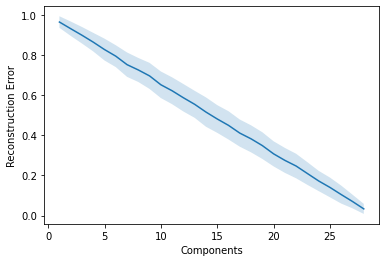

In [504]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
dims_fifa = list(range(1, 29, 1))
reconstruction_error = []
reconstruction_variance = []
for dim in dims_fifa:
    mean_mse = []
    for j in range(0,500):
        grp = GaussianRandomProjection(n_components=dim)
        x_prime = grp.fit_transform(X_train)
        # reconstruction
        A = np.linalg.pinv(grp.components_.T)
        rec_data = np.dot(x_prime, A)
        mean_mse.append(mean_squared_error(X_train, rec_data))
        
    reconstruction_variance.append(np.std(mean_mse))
    reconstruction_error.append(np.mean(mean_mse))
    
reconstruction_error = np.array(reconstruction_error)
plt.plot(dims_fifa,reconstruction_error)
plt.fill_between(dims_fifa,reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
plt.xlabel('Components')
plt.ylabel('Reconstruction Error')
plt.show()

In [144]:
from sklearn.random_projection import GaussianRandomProjection
grp = GaussianRandomProjection(n_components=20, random_state=40)
X_rp = grp.fit_transform(X_train)

# RP k-Means

In [139]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_rp,range_n_clusters)

NameError: name 'k_means' is not defined

For n_clusters=2, The Silhouette Score is 0.34262088012071246
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.27546419323261767
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.27598543048944
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.2365234507442179
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.2332585245790787
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.22489026361491268
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.20582013323329798
-----------------------------------------------------------------------------
For n_clusters=9, The Sil

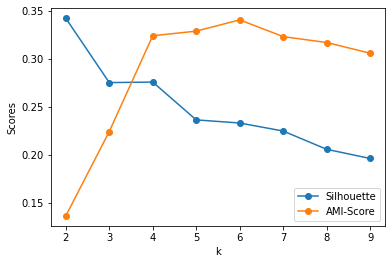

In [359]:
range_n_clusters=list(range(2, 10, 1))
silhouette_ami_plot(X_rp,range_n_clusters,"k-Means")

# RP EMM

For n_components=1, The BIC Score is 241300.31344599475
-----------------------------------------------------------------------------
For n_components=2, The BIC Score is 238240.88044669852
-----------------------------------------------------------------------------
For n_components=3, The BIC Score is 237956.97126517838
-----------------------------------------------------------------------------
For n_components=4, The BIC Score is 237612.61765683445
-----------------------------------------------------------------------------
For n_components=5, The BIC Score is 236361.4749527595
-----------------------------------------------------------------------------
For n_components=6, The BIC Score is 236354.55980653834
-----------------------------------------------------------------------------
For n_components=7, The BIC Score is 236407.45462030912
-----------------------------------------------------------------------------
For n_components=8, The BIC Score is 236524.85192786664
-------

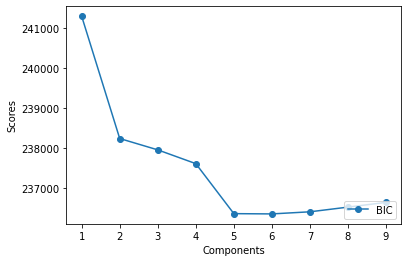

In [360]:
n_components = np.arange(1, 10)
bic_plot(X_rp,n_components)

For n_clusters=1, The Adjusted MI Score is 5.654622289188097e-15
-----------------------------------------------------------------------------
For n_clusters=2, The Adjusted MI Score is 0.3417482721667299
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.5899171365681943
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.6021017057386328
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.5532523133861925
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.5360954022732588
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.5085745062593944
-----------------------------------------------------------------------------
For n_clusters=8,

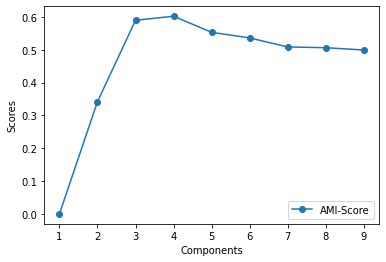

In [361]:
n_components = np.arange(1, 10)
gmm_ami_plot(X_ica,n_components)

# Feature selection ExtraTreesClassifier

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(random_state=40,n_estimators=100)
clf = clf.fit(X_train, y_train)
etcDf = pd.DataFrame()
etcDf["Features"]= X.columns
etcDf["Importances"]= clf.feature_importances_
etcDf = etcDf.sort_values(['Importances'], ascending=False)
etc_model = SelectFromModel(clf, prefit=True)
X_etc = etc_model.transform(X_train)
print(X_etc.shape)


(12702, 12)


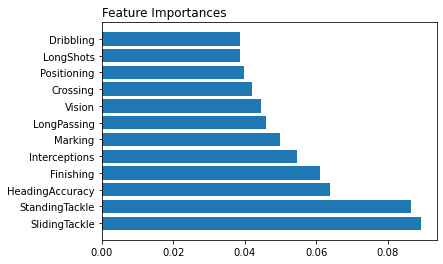

In [529]:
import pandas as pd
from matplotlib import pyplot as plt
 features = etcDf["Features"].head(12)
importances = etcDf["Importances"].head(12)
# Horizontal Bar Plot
plt.barh(features, importances)
# Add Plot Title
plt.title('Feature Importances',
             loc ='left', )
# Show Plot
plt.show()

# ETC k-Means

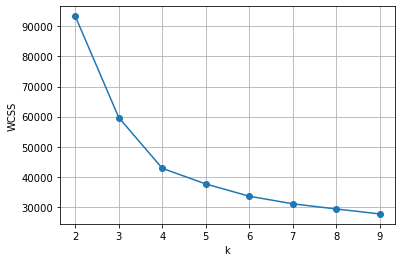

In [365]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_etc,range_n_clusters)

For n_clusters=2, The Silhouette Score is 0.49735874010999226
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.3802831994426478
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.3702606231907037
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.3211801439700883
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.28655232584960527
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.2839775071133113
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.2568754493450061
-----------------------------------------------------------------------------
For n_clusters=9, The Sil

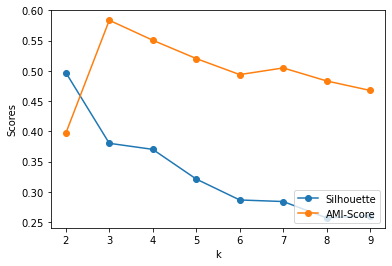

In [366]:
range_n_clusters=list(range(2, 10, 1))
silhouette_ami_plot(X_etc,range_n_clusters,"k-Means")

# ETC EMM

For n_components=1, The BIC Score is 210479.0914766123
-----------------------------------------------------------------------------
For n_components=2, The BIC Score is 181165.3049381385
-----------------------------------------------------------------------------
For n_components=3, The BIC Score is 155252.04908228357
-----------------------------------------------------------------------------
For n_components=4, The BIC Score is 150850.89054549803
-----------------------------------------------------------------------------
For n_components=5, The BIC Score is 147342.204819144
-----------------------------------------------------------------------------
For n_components=6, The BIC Score is 145758.64630518397
-----------------------------------------------------------------------------
For n_components=7, The BIC Score is 144553.32795176038
-----------------------------------------------------------------------------
For n_components=8, The BIC Score is 143905.7488134061
-----------

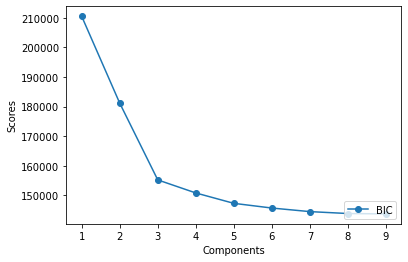

In [368]:
n_components = np.arange(1, 10)
bic_plot(X_etc,n_components)

For n_clusters=1, The Adjusted MI Score is 5.654622289188097e-15
-----------------------------------------------------------------------------
For n_clusters=2, The Adjusted MI Score is 0.4206661287699812
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.5973954217874388
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.5908010362675142
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.574563668517731
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.5371932269839909
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.5171648977468739
-----------------------------------------------------------------------------
For n_clusters=8, 

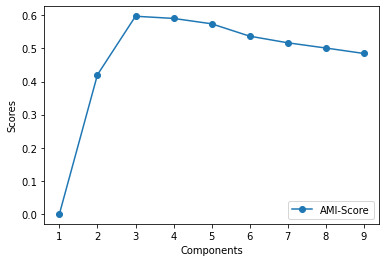

In [369]:
n_components = np.arange(1, 10)
gmm_ami_plot(X_etc,n_components)

# Comparison DR-KMeans

In [186]:
print(X_train.shape)
print(X_pca.shape)
print(X_ica.shape)
print(X_rp.shape)
print(X_etc.shape)

(12702, 29)
(12702, 15)
(12702, 6)
(12702, 22)
(12702, 12)


In [187]:
def silhouette_comparison_plot(range_n_clusters, algo_name):
    sil_scores, sil_times = silhouette_analysis(X_train, range_n_clusters, algo_name)
    sil_pca_scores, sil_pca_times = silhouette_analysis(X_pca, range_n_clusters, algo_name)
    sil_ica_scores, sil_ica_times = silhouette_analysis(X_ica, range_n_clusters, algo_name)
    sil_rp_scores, sil_rp_times = silhouette_analysis(X_rp, range_n_clusters, algo_name)
    sil_etc_scores, sil_etc_times = silhouette_analysis(X_etc, range_n_clusters, algo_name)
    # plotting the scores against the value of k
    plt.plot(range_n_clusters, sil_scores, 'o-', label='Original Silhouette')
    plt.plot(range_n_clusters, sil_pca_scores, 'o-', label='PCA Silhouette')
    plt.plot(range_n_clusters, sil_ica_scores, 'o-', label='ICA Silhouette')
    plt.plot(range_n_clusters, sil_rp_scores, 'o-', label='RP Silhouette')
    plt.plot(range_n_clusters, sil_etc_scores, 'o-', label='ETC Silhouette')
    plt.xlabel('k')
    plt.ylabel('Scores')
    plt.legend(loc=4)
    plt.show()
    

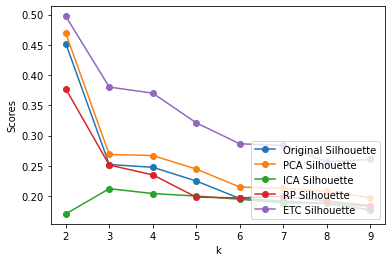

In [188]:
range_n_clusters=list(range(2, 10, 1))
silhouette_comparison_plot(range_n_clusters, "k-Means")

In [148]:
range_n_clusters=list(range(2, 10, 1))

In [170]:
sil_scores, sil_times = silhouette_analysis(X_train, range_n_clusters, "k-Means")

For n_clusters=2, Time elapsed 1.8156261444091797
-----------------------------------------------------------------------------
For n_clusters=3, Time elapsed 1.6324841976165771
-----------------------------------------------------------------------------
For n_clusters=4, Time elapsed 1.6532437801361084
-----------------------------------------------------------------------------
For n_clusters=5, Time elapsed 1.8463947772979736
-----------------------------------------------------------------------------
For n_clusters=6, Time elapsed 2.2925894260406494
-----------------------------------------------------------------------------
For n_clusters=7, Time elapsed 2.3749101161956787
-----------------------------------------------------------------------------
For n_clusters=8, Time elapsed 2.5749173164367676
-----------------------------------------------------------------------------
For n_clusters=9, Time elapsed 2.8010754585266113
------------------------------------------------------

In [161]:
sil_pca_scores, sil_pca_times = silhouette_analysis(X_pca, range_n_clusters, "k-Means")

For n_clusters=2, Time elapsed 1.7428154945373535
-----------------------------------------------------------------------------
For n_clusters=3, Time elapsed 1.6694293022155762
-----------------------------------------------------------------------------
For n_clusters=4, Time elapsed 1.6751658916473389
-----------------------------------------------------------------------------
For n_clusters=5, Time elapsed 1.6474406719207764
-----------------------------------------------------------------------------
For n_clusters=6, Time elapsed 1.670907974243164
-----------------------------------------------------------------------------
For n_clusters=7, Time elapsed 1.821732521057129
-----------------------------------------------------------------------------
For n_clusters=8, Time elapsed 2.4579038619995117
-----------------------------------------------------------------------------
For n_clusters=9, Time elapsed 2.767831325531006
---------------------------------------------------------

In [168]:
sil_ica_scores, sil_ica_times = silhouette_analysis(X_ica, range_n_clusters, "k-Means")

For n_clusters=2, Time elapsed 1.630782127380371
-----------------------------------------------------------------------------
For n_clusters=3, Time elapsed 1.663097858428955
-----------------------------------------------------------------------------
For n_clusters=4, Time elapsed 1.6046490669250488
-----------------------------------------------------------------------------
For n_clusters=5, Time elapsed 1.8269047737121582
-----------------------------------------------------------------------------
For n_clusters=6, Time elapsed 2.1074819564819336
-----------------------------------------------------------------------------
For n_clusters=7, Time elapsed 2.3146541118621826
-----------------------------------------------------------------------------
For n_clusters=8, Time elapsed 2.650451183319092
-----------------------------------------------------------------------------
For n_clusters=9, Time elapsed 2.7724592685699463
---------------------------------------------------------

In [156]:
sil_rp_scores, sil_rp_times = silhouette_analysis(X_rp, range_n_clusters, "k-Means")

For n_clusters=2, Time elapsed 1.6311535835266113
-----------------------------------------------------------------------------
For n_clusters=3, Time elapsed 1.6354169845581055
-----------------------------------------------------------------------------
For n_clusters=4, Time elapsed 1.6859760284423828
-----------------------------------------------------------------------------
For n_clusters=5, Time elapsed 1.6524748802185059
-----------------------------------------------------------------------------
For n_clusters=6, Time elapsed 1.7345335483551025
-----------------------------------------------------------------------------
For n_clusters=7, Time elapsed 1.9112541675567627
-----------------------------------------------------------------------------
For n_clusters=8, Time elapsed 2.620175361633301
-----------------------------------------------------------------------------
For n_clusters=9, Time elapsed 2.700291633605957
--------------------------------------------------------

In [163]:
sil_etc_scores, sil_etc_times = silhouette_analysis(X_etc, range_n_clusters, "k-Means")

For n_clusters=2, Time elapsed 1.7080988883972168
-----------------------------------------------------------------------------
For n_clusters=3, Time elapsed 1.5280778408050537
-----------------------------------------------------------------------------
For n_clusters=4, Time elapsed 1.556412696838379
-----------------------------------------------------------------------------
For n_clusters=5, Time elapsed 1.5634429454803467
-----------------------------------------------------------------------------
For n_clusters=6, Time elapsed 1.6791927814483643
-----------------------------------------------------------------------------
For n_clusters=7, Time elapsed 1.781202793121338
-----------------------------------------------------------------------------
For n_clusters=8, Time elapsed 2.2323920726776123
-----------------------------------------------------------------------------
For n_clusters=9, Time elapsed 2.8292715549468994
--------------------------------------------------------

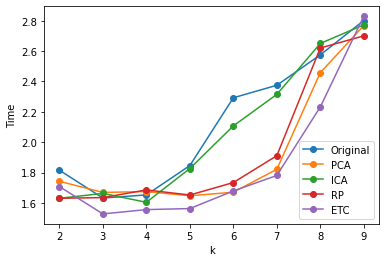

In [191]:
plt.plot(range_n_clusters, sil_times, 'o-', label='Original')
plt.plot(range_n_clusters, sil_pca_times, 'o-', label='PCA')
plt.plot(range_n_clusters, sil_ica_times, 'o-', label='ICA')
plt.plot(range_n_clusters, sil_rp_times, 'o-', label='RP')
plt.plot(range_n_clusters, sil_etc_times, 'o-', label='ETC')
plt.xlabel('k')
plt.ylabel('Time')
plt.legend(loc=4)
plt.show()

In [194]:
range_n_clusters=list(range(2, 10, 1))
algo_name = "k-Means"
ami_original_scores, ami_times = ami_analysis(X_train, range_n_clusters, algo_name)
ami_pca_scores, ami_pca_times = ami_analysis(X_pca, range_n_clusters, algo_name)
ami_ica_scores, ami_ica_times = ami_analysis(X_ica, range_n_clusters, algo_name)
ami_rp_scores, ami_rp_times = ami_analysis(X_rp, range_n_clusters, algo_name)
ami_etc_scores, ami_etc_times = ami_analysis(X_etc, range_n_clusters, algo_name)

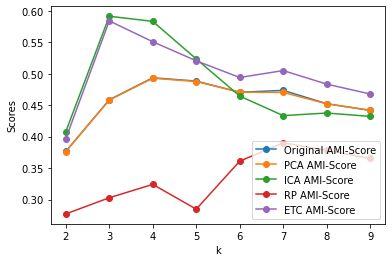

In [203]:
# plotting the scores against the value of k
plt.plot(range_n_clusters, ami_original_scores, 'o-', label='Original AMI-Score')
plt.plot(range_n_clusters, ami_pca_scores, 'o-', label='PCA AMI-Score')
plt.plot(range_n_clusters, ami_ica_scores, 'o-', label='ICA AMI-Score')
plt.plot(range_n_clusters, ami_rp_scores, 'o-', label='RP AMI-Score')
plt.plot(range_n_clusters, ami_etc_scores, 'o-', label='ETC AMI-Score')
plt.xlabel('k')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.show()

#  Comparison DR- EMM

In [209]:
range_n_clusters=list(range(2, 10, 1))
algo_name = "GMM"
sil_original_scores,sil_times = silhouette_analysis(X_train, range_n_clusters, algo_name)
sil_pca_scores,sil_pca_times = silhouette_analysis(X_pca, range_n_clusters, algo_name)
sil_ica_scores,sil_ica_times = silhouette_analysis(X_ica, range_n_clusters, algo_name)
sil_rp_scores,sil_rp_times = silhouette_analysis(X_rp, range_n_clusters, algo_name)
sil_etc_scores,sil_etc_times = silhouette_analysis(X_etc, range_n_clusters, algo_name)

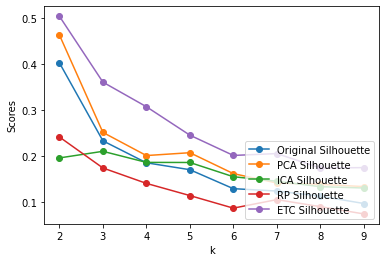

In [210]:
# plotting the scores against the value of k
plt.plot(range_n_clusters, sil_original_scores, 'o-', label='Original Silhouette')
plt.plot(range_n_clusters, sil_pca_scores, 'o-', label='PCA Silhouette')
plt.plot(range_n_clusters, sil_ica_scores, 'o-', label='ICA Silhouette')
plt.plot(range_n_clusters, sil_rp_scores, 'o-', label='RP Silhouette')
plt.plot(range_n_clusters, sil_etc_scores, 'o-', label='ETC Silhouette')
plt.xlabel('k')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.show()

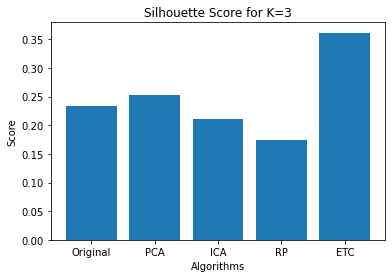

In [211]:
algos = ["Original","PCA","ICA","RP","ETC"]
scores = [sil_original_scores[1],sil_pca_scores[1],sil_ica_scores[1],sil_rp_scores[1],sil_etc_scores[1]]

# creating the bar plot
plt.bar(algos, scores)
plt.xlabel("Algorithms")
plt.ylabel("Score")
plt.title("Silhouette Score for K=3")
plt.show()

In [204]:
range_n_clusters=list(range(2, 10, 1))
algo_name = "GMM"
ami_original_scores,ami_times = ami_analysis(X_train, range_n_clusters, algo_name)
ami_pca_scores,ami_pca_times = ami_analysis(X_pca, range_n_clusters, algo_name)
ami_ica_scores,ami_ica_times = ami_analysis(X_ica, range_n_clusters, algo_name)
ami_rp_scores,ami_rp_times = ami_analysis(X_rp, range_n_clusters, algo_name)
ami_etc_scores,ami_etc_times = ami_analysis(X_etc, range_n_clusters, algo_name)

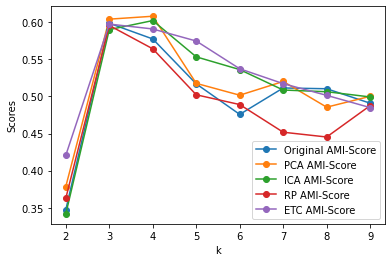

In [205]:
# plotting the scores against the value of k
plt.plot(range_n_clusters, ami_original_scores, 'o-', label='Original AMI-Score')
plt.plot(range_n_clusters, ami_pca_scores, 'o-', label='PCA AMI-Score')
plt.plot(range_n_clusters, ami_ica_scores, 'o-', label='ICA AMI-Score')
plt.plot(range_n_clusters, ami_rp_scores, 'o-', label='RP AMI-Score')
plt.plot(range_n_clusters, ami_etc_scores, 'o-', label='ETC AMI-Score')
plt.xlabel('k')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.show()

In [ ]:
algos = ["Original","PCA","ICA","RP","ETC"]
scores = [ami_original_scores[1],ami_pca_scores[1],ami_ica_scores[1],ami_rp_scores[1],ami_etc_scores[1]]

# creating the bar plot
plt.bar(algos, scores)
plt.xlabel("Algorithms")
plt.ylabel("Score")
plt.title("Silhouette Score for K=3")
plt.show()

In [207]:
range_n_clusters=list(range(2, 10, 1))
bic_original_scores,bic_times = bic_analysis(X_train, range_n_clusters)
bic_pca_scores,bic_pca_times = bic_analysis(X_pca, range_n_clusters)
bic_ica_scores,bic_ica_times = bic_analysis(X_ica, range_n_clusters)
bic_rp_scores,bic_rp_times = bic_analysis(X_rp, range_n_clusters)
bic_etc_scores,bic_etc_times = bic_analysis(X_etc, range_n_clusters)

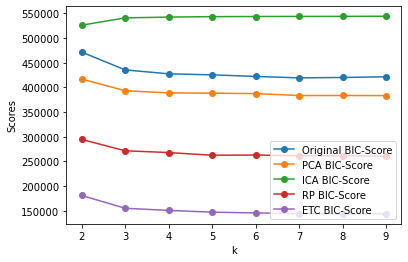

In [208]:
# plotting the scores against the value of k
plt.plot(range_n_clusters, bic_original_scores, 'o-', label='Original BIC-Score')
plt.plot(range_n_clusters, bic_pca_scores, 'o-', label='PCA BIC-Score')
plt.plot(range_n_clusters, bic_ica_scores, 'o-', label='ICA BIC-Score')
plt.plot(range_n_clusters, bic_rp_scores, 'o-', label='RP BIC-Score')
plt.plot(range_n_clusters, bic_etc_scores, 'o-', label='ETC BIC-Score')
plt.xlabel('k')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.show()

In [219]:
print(X_train.shape)
print(X_pca.shape)
print(X_ica.shape)
print(X_rp.shape)
print(X_etc.shape)

(12702, 29)
(12702, 15)
(12702, 6)
(12702, 22)
(12702, 12)


# NN- PCA

In [92]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector 


X_pca_train=X_pca
X_pca_test=pca.transform(X_test)
y_pca_train=y_train
y_pca_test=y_test

#X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.3, stratify=y, random_state=40)
s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)

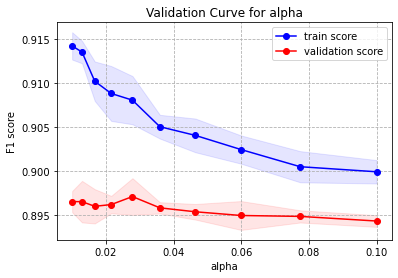

In [190]:
from sklearn.model_selection import validation_curve
alphas=np.logspace(-2, -1, 10)
pipeline = make_pipeline(MLPClassifier(random_state=40,max_iter=300))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_pca_train, y=y_pca_train, param_name="mlpclassifier__alpha", param_range=alphas,
        cv=s_kfold, scoring="f1_macro", n_jobs=-1)
plot_validation_curve(alphas, train_scores, test_scores, 'alpha', title="Validation Curve for alpha")

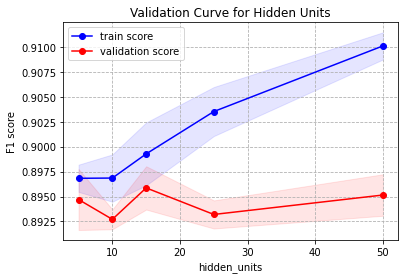

In [191]:
from sklearn.model_selection import validation_curve
hidden_units=[(5,),(10,),(15,),(25,),(50,)]
hidden_units_labels=[5,10,15,25,50]
pipeline = make_pipeline(MLPClassifier(random_state=40,max_iter=300))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_pca_train, y=y_pca_train, param_name="mlpclassifier__hidden_layer_sizes", param_range=hidden_units,
        cv=s_kfold, scoring="f1_macro", n_jobs=-1)
plot_validation_curve(hidden_units_labels, train_scores, test_scores, 'hidden_units', title="Validation Curve for Hidden Units")

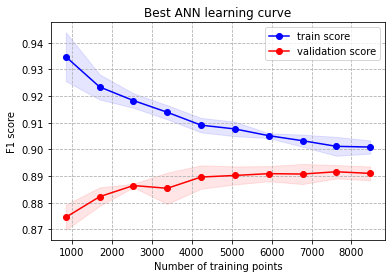

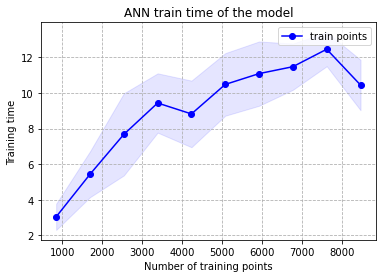

ANN: Predict Time= 0.004
ANN: F1 score= 0.893
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1025
           1       0.92      0.93      0.92      1760
           2       1.00      1.00      1.00       608
           3       0.83      0.86      0.84      2052

    accuracy                           0.88      5445
   macro avg       0.90      0.89      0.89      5445
weighted avg       0.88      0.88      0.88      5445

[[ 790    5    0  230]
 [   1 1628    0  131]
 [   0    0  608    0]
 [ 143  145    0 1764]]


In [93]:
from sklearn.neural_network import MLPClassifier
pca_pipeline = make_pipeline(MLPClassifier(alpha=0.03, random_state=40, max_iter=500,learning_rate='constant',solver='adam',hidden_layer_sizes=(15,)))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pca_pipeline, X=X_pca_train, y=y_pca_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Best ANN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'ANN train time of the model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
pca_pipeline.fit(X_pca_train, y_pca_train)

# calculate f1 score
import time
start = time.time()
y_pred = pca_pipeline.predict(X_pca_test)
diff=time.time() - start
print('ANN: Predict Time= %.3f' %  diff)
# summarize scores
print('ANN: F1 score= %.3f' %  f1_score(y_pca_test, y_pred, average="macro"))
print(classification_report(y_pca_test, y_pred))
print(confusion_matrix(y_pca_test, y_pred))

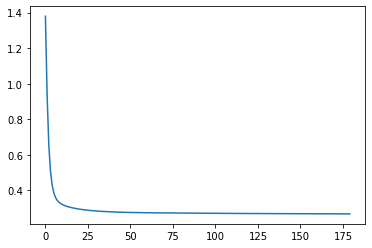

In [18]:
import matplotlib.pyplot as plt

plt.plot(pipeline.steps[0][1].loss_curve_)
plt.show()

# NN- ICA

In [94]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector 


X_ica_train=X_ica
X_ica_test=fast_ica.transform(X_test)
y_ica_train=y_train
y_ica_test=y_test

s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)

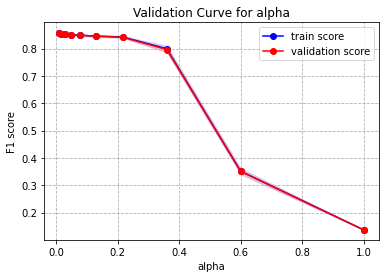

In [208]:
from sklearn.model_selection import validation_curve
alphas=np.logspace(-2, 0, 10)
pipeline = make_pipeline(MLPClassifier(random_state=40,max_iter=300))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_ica_train, y=y_ica_train, param_name="mlpclassifier__alpha", param_range=alphas,
        cv=s_kfold, scoring="f1_macro", n_jobs=-1)
plot_validation_curve(alphas, train_scores, test_scores, 'alpha', title="Validation Curve for alpha")

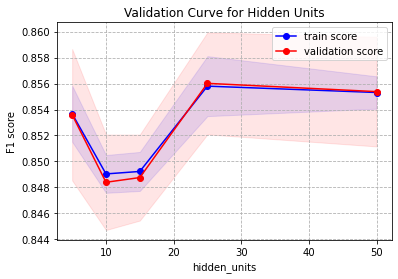

In [209]:
from sklearn.model_selection import validation_curve
hidden_units=[(5,),(10,),(15,),(25,),(50,)]
hidden_units_labels=[5,10,15,25,50]
pipeline = make_pipeline(MLPClassifier(random_state=40,max_iter=300))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_ica_train, y=y_ica_train, param_name="mlpclassifier__hidden_layer_sizes", param_range=hidden_units,
        cv=s_kfold, scoring="f1_macro", n_jobs=-1)
plot_validation_curve(hidden_units_labels, train_scores, test_scores, 'hidden_units', title="Validation Curve for Hidden Units")

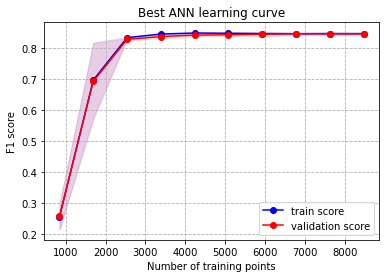

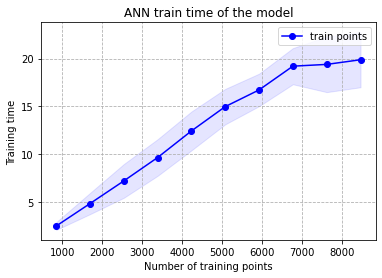

ANN: Predict Time= 0.002
ANN: F1 score= 0.846
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1025
           1       0.82      0.84      0.83      1760
           2       1.00      1.00      1.00       608
           3       0.75      0.76      0.76      2052

    accuracy                           0.82      5445
   macro avg       0.85      0.84      0.85      5445
weighted avg       0.82      0.82      0.82      5445

[[ 780    1    0  244]
 [   0 1485    0  275]
 [   0    0  608    0]
 [ 164  321    0 1567]]


In [96]:
from sklearn.neural_network import MLPClassifier
ica_pipeline = make_pipeline(MLPClassifier(alpha=0.05,random_state=40, max_iter=500,learning_rate='constant',solver='adam',hidden_layer_sizes=(10,)))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=ica_pipeline, X=X_ica_train, y=y_ica_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Best ANN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'ANN train time of the model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
ica_pipeline.fit(X_ica_train, y_ica_train)

# calculate f1 score
import time
start = time.time()
y_pred = ica_pipeline.predict(X_ica_test)
diff=time.time() - start
print('ANN: Predict Time= %.3f' %  diff)
# summarize scores
print('ANN: F1 score= %.3f' %  f1_score(y_ica_test, y_pred, average="macro"))
print(classification_report(y_ica_test, y_pred))
print(confusion_matrix(y_ica_test, y_pred))

# NN- RP

In [140]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector 


X_rp_train=X_rp
X_rp_test=grp.transform(X_test)
y_rp_train=y_train
y_rp_test=y_test
s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)

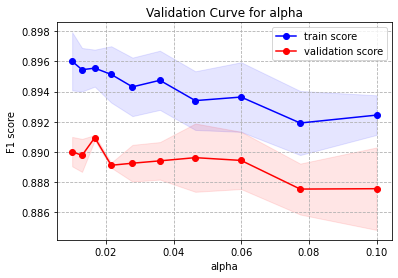

In [216]:
from sklearn.model_selection import validation_curve
alphas=np.logspace(-2, -1, 10)
pipeline = make_pipeline(MLPClassifier(random_state=40,max_iter=300))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_rp_train, y=y_rp_train, param_name="mlpclassifier__alpha", param_range=alphas,
        cv=s_kfold, scoring="f1_macro", n_jobs=-1)
plot_validation_curve(alphas, train_scores, test_scores, 'alpha', title="Validation Curve for alpha")

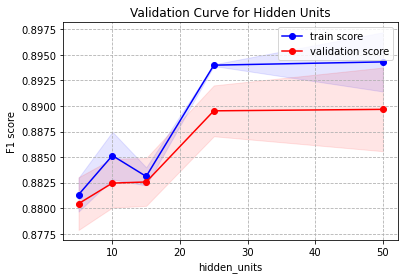

In [215]:
from sklearn.model_selection import validation_curve
hidden_units=[(5,),(10,),(15,),(25,),(50,)]
hidden_units_labels=[5,10,15,25,50]
pipeline = make_pipeline(MLPClassifier(random_state=40,max_iter=300))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_rp_train, y=y_rp_train, param_name="mlpclassifier__hidden_layer_sizes", param_range=hidden_units,
        cv=s_kfold, scoring="f1_macro", n_jobs=-1)
plot_validation_curve(hidden_units_labels, train_scores, test_scores, 'hidden_units', title="Validation Curve for Hidden Units")

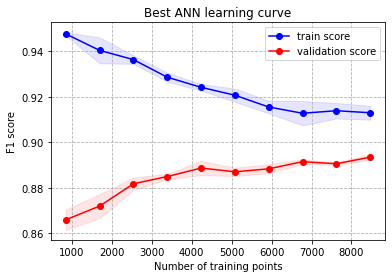

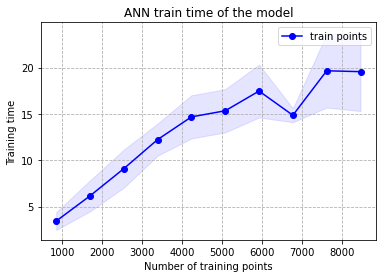

ANN: Predict Time= 0.005
ANN: F1 score= 0.897
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1025
           1       0.92      0.94      0.93      1760
           2       1.00      1.00      1.00       608
           3       0.84      0.86      0.85      2052

    accuracy                           0.89      5445
   macro avg       0.90      0.89      0.90      5445
weighted avg       0.88      0.89      0.88      5445

[[ 792    4    0  229]
 [   0 1647    0  113]
 [   0    0  608    0]
 [ 146  133    0 1773]]


In [141]:
from sklearn.neural_network import MLPClassifier
rp_pipeline = make_pipeline(MLPClassifier(alpha=0.02,random_state=40,max_iter=500,learning_rate='constant',solver='adam',hidden_layer_sizes=(20,)))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=rp_pipeline, X=X_rp_train, y=y_rp_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Best ANN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'ANN train time of the model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
rp_pipeline.fit(X_rp_train, y_rp_train)

# calculate f1 score
import time
start = time.time()
y_pred = rp_pipeline.predict(X_rp_test)
diff=time.time() - start
print('ANN: Predict Time= %.3f' %  diff)
# summarize scores
print('ANN: F1 score= %.3f' %  f1_score(y_rp_test, y_pred, average="macro"))
print(classification_report(y_rp_test, y_pred))
print(confusion_matrix(y_rp_test, y_pred))

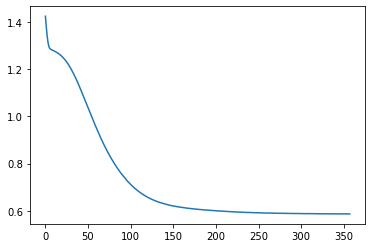

In [142]:
import matplotlib.pyplot as plt

plt.plot(pipeline.steps[0][1].loss_curve_)
plt.show()

# NN- ETC

In [100]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector 

X_etc_train=X_etc
X_etc_test=etc_model.transform(X_test)
y_etc_train=y_train
y_etc_test=y_test

s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)

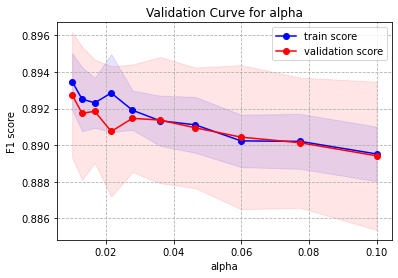

In [230]:
from sklearn.model_selection import validation_curve
alphas=np.logspace(-2, -1, 10)
pipeline = make_pipeline(MLPClassifier(random_state=40,max_iter=300))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_etc_train, y=y_etc_train, param_name="mlpclassifier__alpha", param_range=alphas,
        cv=s_kfold, scoring="f1_macro", n_jobs=-1)
plot_validation_curve(alphas, train_scores, test_scores, 'alpha', title="Validation Curve for alpha")

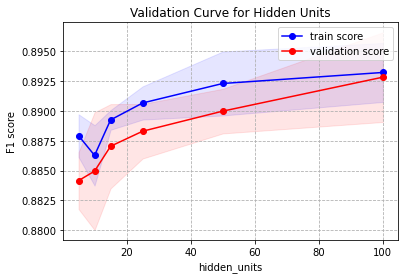

In [233]:
from sklearn.model_selection import validation_curve
hidden_units=[(5,),(10,),(15,),(25,),(50,),(100,)]
hidden_units_labels=[5,10,15,25,50,100]
pipeline = make_pipeline(MLPClassifier(random_state=40,max_iter=300))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_etc_train, y=y_etc_train, param_name="mlpclassifier__hidden_layer_sizes", param_range=hidden_units,
        cv=s_kfold, scoring="f1_macro", n_jobs=-1)
plot_validation_curve(hidden_units_labels, train_scores, test_scores, 'hidden_units', title="Validation Curve for Hidden Units")

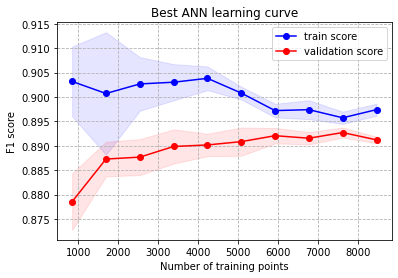

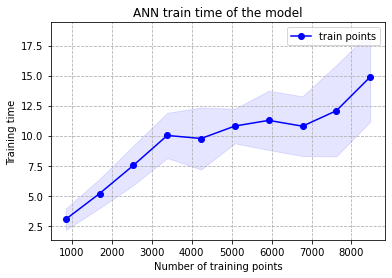

ANN: Predict Time= 0.003
ANN: F1 score= 0.892
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1025
           1       0.91      0.92      0.92      1760
           2       1.00      1.00      1.00       608
           3       0.82      0.86      0.84      2052

    accuracy                           0.88      5445
   macro avg       0.90      0.89      0.89      5445
weighted avg       0.88      0.88      0.88      5445

[[ 778    4    0  243]
 [   0 1625    0  135]
 [   0    0  608    0]
 [ 127  151    0 1774]]


In [101]:
from sklearn.neural_network import MLPClassifier
etc_pipeline = make_pipeline(MLPClassifier(alpha=0.01,random_state=40, max_iter=500, learning_rate='adaptive',solver='adam',hidden_layer_sizes=(10,)))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=etc_pipeline, X=X_etc_train, y=y_etc_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Best ANN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'ANN train time of the model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
etc_pipeline.fit(X_etc_train, y_etc_train)

# calculate f1 score
import time
start = time.time()
y_pred = etc_pipeline.predict(X_etc_test)
diff=time.time() - start
print('ANN: Predict Time= %.3f' %  diff)
# summarize scores
print('ANN: F1 score= %.3f' %  f1_score(y_etc_test, y_pred, average="macro"))
print(classification_report(y_etc_test, y_pred))
print(confusion_matrix(y_etc_test, y_pred))

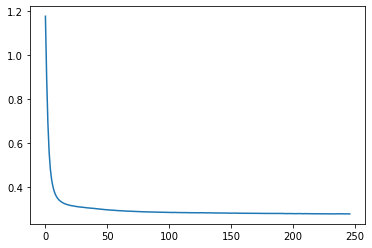

In [48]:
import matplotlib.pyplot as plt

plt.plot(pipeline.steps[0][1].loss_curve_)
plt.show()

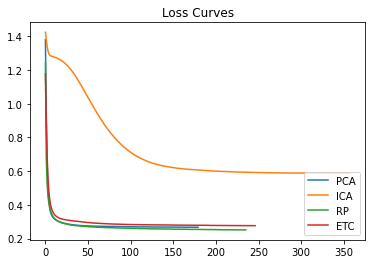

In [143]:
import matplotlib.pyplot as plt
# plotting the nn losses against the value of k
plt.plot(pca_pipeline.steps[0][1].loss_curve_,  label='PCA')
plt.plot(ica_pipeline.steps[0][1].loss_curve_,  label='ICA')
plt.plot(rp_pipeline.steps[0][1].loss_curve_ , label='RP')
plt.plot(etc_pipeline.steps[0][1].loss_curve_,  label='ETC')
plt.title('Loss Curves')
plt.legend(loc=4)
plt.show()

# NN- k-Means

In [392]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
kmeans = KMeans(n_clusters=2,random_state=40).fit(X_train)
X_kmeans_labels = kmeans.labels_.reshape(X_train.shape[0],1)
df1 = pd.DataFrame(X_train)
df1['cluster_labels']=X_kmeans_labels
one_hot_encoder=OneHotEncoder()
data_prep=make_column_transformer((make_pipeline(one_hot_encoder), ['cluster_labels']),
                                  remainder="passthrough")
X_kmeans_train = data_prep.fit_transform(df1)
y_kmeans_train=y_train
print(X_kmeans_train.shape)
print(y_kmeans_train.shape)

X_test_labels=kmeans.predict(X_test)
df2 = pd.DataFrame(X_test)
df2['cluster_labels']=X_test_labels
X_kmeans_test = data_prep.fit_transform(df2)
y_kmeans_test=y_test
print(X_kmeans_test.shape)
print(y_kmeans_test.shape)

s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)


(12702, 31)
(12702,)
(5445, 31)
(5445,)


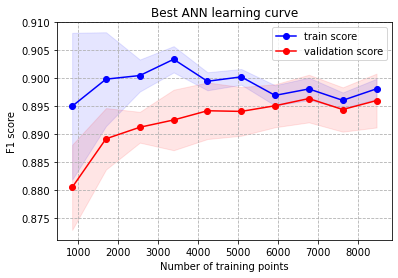

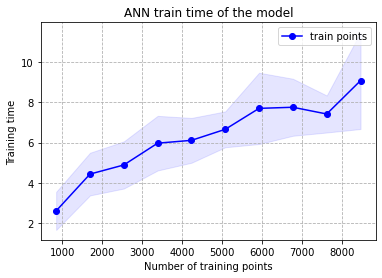

ANN: Predict Time= 0.005
ANN: F1 score= 0.893
              precision    recall  f1-score   support

           0       0.85      0.77      0.80      1025
           1       0.94      0.91      0.92      1760
           2       1.00      1.00      1.00       608
           3       0.82      0.88      0.85      2052

    accuracy                           0.88      5445
   macro avg       0.90      0.89      0.89      5445
weighted avg       0.88      0.88      0.88      5445

[[ 785    3    0  237]
 [   0 1595    0  165]
 [   0    0  608    0]
 [ 143  105    0 1804]]


In [393]:
from sklearn.neural_network import MLPClassifier
pipeline = make_pipeline(MLPClassifier(alpha=0.1, random_state=40, max_iter=500, learning_rate='constant',solver='adam',hidden_layer_sizes=(15,)))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_kmeans_train, y=y_kmeans_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Best ANN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'ANN train time of the model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
pipeline.fit(X_kmeans_train, y_kmeans_train)

# calculate f1 score
import time
start = time.time()
y_pred = pipeline.predict(X_kmeans_test)
diff=time.time() - start
print('ANN: Predict Time= %.3f' %  diff)
# summarize scores
print('ANN: F1 score= %.3f' %  f1_score(y_kmeans_test, y_pred, average="macro"))
print(classification_report(y_kmeans_test, y_pred))
print(confusion_matrix(y_kmeans_test, y_pred))

In [395]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
kmeans = KMeans(n_clusters=2,random_state=40).fit(X_train)
X_kmeans_labels = kmeans.labels_.reshape(X_train.shape[0],1)
X_kmeans_train = one_hot_encoder.fit_transform(X_kmeans_labels)
y_kmeans_train=y_train
print(X_kmeans_train.shape)
print(y_kmeans_train.shape)

X_test_labels=kmeans.predict(X_test)
X_test_labels = X_test_labels.reshape(X_test.shape[0],1)
X_kmeans_test = one_hot_encoder.fit_transform(X_test_labels)
y_kmeans_test=y_test
print(X_kmeans_test.shape)
print(y_kmeans_test.shape)

s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)



(12702, 2)
(12702,)
(5445, 2)
(5445,)


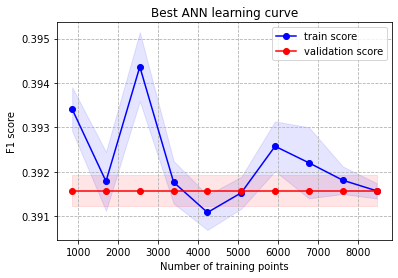

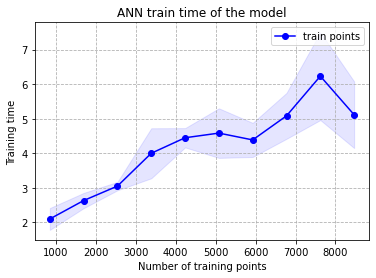

ANN: Predict Time= 0.003
ANN: F1 score= 0.390
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1025
           1       0.00      0.00      0.00      1760
           2       0.93      1.00      0.96       608
           3       0.43      1.00      0.60      2052

    accuracy                           0.49      5445
   macro avg       0.34      0.50      0.39      5445
weighted avg       0.26      0.49      0.33      5445

[[   0    0    3 1022]
 [   0    0   46 1714]
 [   0    0  608    0]
 [   0    0    0 2052]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [396]:
from sklearn.neural_network import MLPClassifier
pipeline = make_pipeline(MLPClassifier(alpha=0.1, random_state=40, max_iter=500, learning_rate='constant',solver='adam',hidden_layer_sizes=(15,)))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_kmeans_train, y=y_kmeans_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Best ANN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'ANN train time of the model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
pipeline.fit(X_kmeans_train, y_kmeans_train)

# calculate f1 score
import time
start = time.time()
y_pred = pipeline.predict(X_kmeans_test)
diff=time.time() - start
print('ANN: Predict Time= %.3f' %  diff)
# summarize scores
print('ANN: F1 score= %.3f' %  f1_score(y_kmeans_test, y_pred, average="macro"))
print(classification_report(y_kmeans_test, y_pred))
print(confusion_matrix(y_kmeans_test, y_pred))

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
kmeans = KMeans(n_clusters=2,random_state=40).fit(X_train)
X_kmeans_train = kmeans.transform(X_train)
y_kmeans_train=y_train
print(X_kmeans_train.shape)
print(y_kmeans_train.shape)

X_kmeans_test = kmeans.transform(X_test)
y_kmeans_test=y_test
print(X_kmeans_test.shape)
print(y_kmeans_test.shape)

s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)

(12702, 2)
(12702,)
(5445, 2)
(5445,)


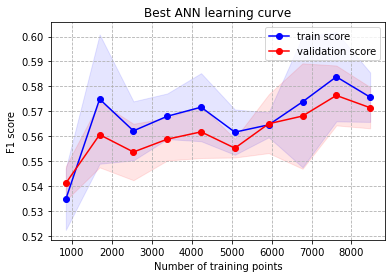

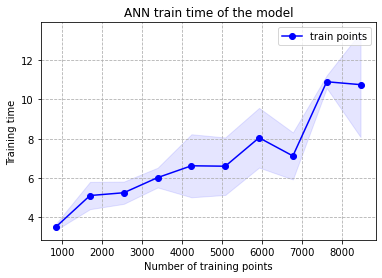

ANN: Predict Time= 0.005
ANN: F1 score= 0.597
              precision    recall  f1-score   support

           0       0.35      0.21      0.27      1025
           1       0.62      0.41      0.49      1760
           2       1.00      1.00      1.00       608
           3       0.53      0.79      0.63      2052

    accuracy                           0.58      5445
   macro avg       0.63      0.60      0.60      5445
weighted avg       0.58      0.58      0.56      5445

[[ 219  229    0  577]
 [ 180  713    0  867]
 [   0    1  607    0]
 [ 226  205    0 1621]]


In [16]:
from sklearn.neural_network import MLPClassifier
k_means_pipeline = make_pipeline(MLPClassifier(alpha=0.1,random_state=40, max_iter=500, learning_rate='constant',solver='adam',hidden_layer_sizes=(15,)))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=k_means_pipeline, X=X_kmeans_train, y=y_kmeans_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Best ANN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'ANN train time of the model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
k_means_pipeline.fit(X_kmeans_train, y_kmeans_train)

# calculate f1 score
import time
start = time.time()
y_pred = k_means_pipeline.predict(X_kmeans_test)
diff=time.time() - start
print('ANN: Predict Time= %.3f' %  diff)
# summarize scores
print('ANN: F1 score= %.3f' %  f1_score(y_kmeans_test, y_pred, average="macro"))
print(classification_report(y_kmeans_test, y_pred))
print(confusion_matrix(y_kmeans_test, y_pred))

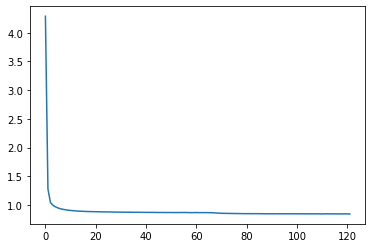

In [70]:
import matplotlib.pyplot as plt

plt.plot(pipeline.steps[0][1].loss_curve_)
plt.show()

# NN- EMM

In [141]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder
gmm = GaussianMixture(3, covariance_type='full', random_state=40).fit(X_train)
X_gmm_labels =gmm.predict(X_train).reshape(X_train.shape[0],1)
df1 = pd.DataFrame(X_train)
df1['cluster_labels']=X_gmm_labels
one_hot_encoder=OneHotEncoder()
data_prep=make_column_transformer((make_pipeline(one_hot_encoder), ['cluster_labels']),
                                  remainder="passthrough")
X_gmm_train = data_prep.fit_transform(df1)
y_gmm_train=y_train
print(X_gmm_train.shape)
print(y_gmm_train.shape)

X_test_labels=gmm.predict(X_test)
df2 = pd.DataFrame(X_test)
df2['cluster_labels']=X_test_labels
X_gmm_test = data_prep.fit_transform(df2)
y_gmm_test=y_test
print(X_gmm_test.shape)
print(y_gmm_test.shape)

s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)



(12702, 32)
(12702,)
(5445, 32)
(5445,)


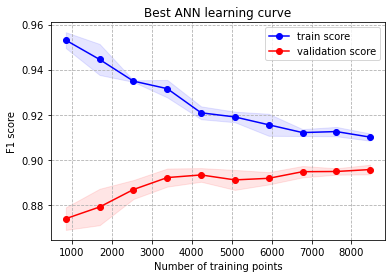

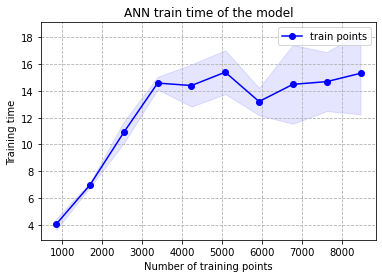

ANN: Predict Time= 0.006
ANN: F1 score= 0.897
              precision    recall  f1-score   support

           0       0.87      0.73      0.80      1025
           1       0.93      0.94      0.93      1760
           2       1.00      1.00      1.00       608
           3       0.83      0.89      0.86      2052

    accuracy                           0.89      5445
   macro avg       0.91      0.89      0.90      5445
weighted avg       0.89      0.89      0.89      5445

[[ 752    5    0  268]
 [   0 1649    0  111]
 [   0    0  608    0]
 [ 109  123    0 1820]]


In [142]:
from sklearn.neural_network import MLPClassifier
pipeline = make_pipeline(MLPClassifier(alpha=0.1,random_state=40, max_iter=500, learning_rate='constant',solver='adam',hidden_layer_sizes=(15,)))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_gmm_train, y=y_gmm_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Best ANN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'ANN train time of the model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
pipeline.fit(X_gmm_train, y_gmm_train)

# calculate f1 score
import time
start = time.time()
y_pred = pipeline.predict(X_gmm_test)
diff=time.time() - start
print('ANN: Predict Time= %.3f' %  diff)
# summarize scores
print('ANN: F1 score= %.3f' %  f1_score(y_gmm_test, y_pred, average="macro"))
print(classification_report(y_gmm_test, y_pred))
print(confusion_matrix(y_gmm_test, y_pred))

In [143]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder
gmm = GaussianMixture(3, covariance_type='full', random_state=40).fit(X_train)
X_gmm_labels =gmm.predict(X_train).reshape(X_train.shape[0],1)
X_gmm_train = one_hot_encoder.fit_transform(X_gmm_labels)
y_gmm_train=y_train
print(X_gmm_train.shape)
print(y_gmm_train.shape)

X_test_labels=gmm.predict(X_test)
X_test_labels = X_test_labels.reshape(X_test.shape[0],1)
X_gmm_test = one_hot_encoder.fit_transform(X_test_labels)
y_gmm_test=y_test
print(X_gmm_test.shape)
print(y_gmm_test.shape)

s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)

(12702, 3)
(12702,)
(5445, 3)
(5445,)


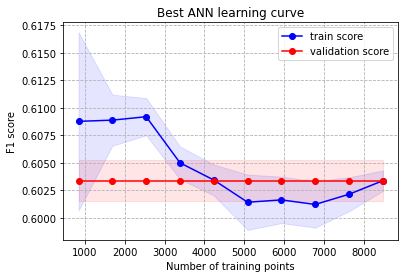

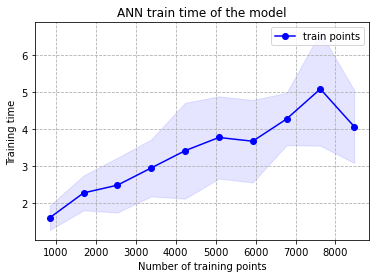

ANN: Predict Time= 0.002
ANN: F1 score= 0.604
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1025
           1       0.70      0.97      0.82      1760
           2       1.00      1.00      1.00       608
           3       0.56      0.65      0.60      2052

    accuracy                           0.67      5445
   macro avg       0.56      0.66      0.60      5445
weighted avg       0.55      0.67      0.60      5445

[[   0    6    0 1019]
 [   0 1714    0   46]
 [   0    0  608    0]
 [   0  720    0 1332]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
from sklearn.neural_network import MLPClassifier
pipeline = make_pipeline(MLPClassifier(alpha=0.1, random_state=40, max_iter=500, learning_rate='constant',solver='adam',hidden_layer_sizes=(15,)))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_gmm_train, y=y_gmm_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Best ANN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'ANN train time of the model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
pipeline.fit(X_gmm_train, y_gmm_train)

# calculate f1 score
import time
start = time.time()
y_pred = pipeline.predict(X_gmm_test)
diff=time.time() - start
print('ANN: Predict Time= %.3f' %  diff)
# summarize scores
print('ANN: F1 score= %.3f' %  f1_score(y_gmm_test, y_pred, average="macro"))
print(classification_report(y_gmm_test, y_pred))
print(confusion_matrix(y_gmm_test, y_pred))

In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder
gmm = GaussianMixture(3, covariance_type='full', random_state=40).fit(X_train)
X_gmm_train = gmm.predict_proba(X_train)
y_gmm_train=y_train
print(X_gmm_train.shape)
print(y_gmm_train.shape)

X_gmm_test = gmm.predict_proba(X_test)
y_gmm_test=y_test
print(X_gmm_test.shape)
print(y_gmm_test.shape)

s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)

(12702, 3)
(12702,)
(5445, 3)
(5445,)


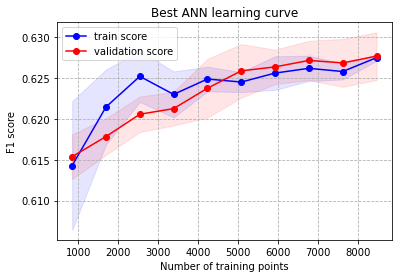

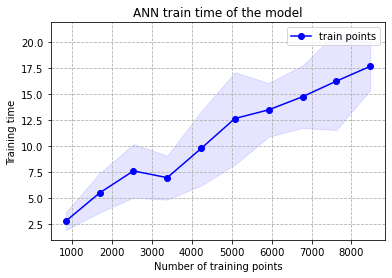

ANN: Predict Time= 0.003
ANN: F1 score= 0.628
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1025
           1       0.79      0.92      0.85      1760
           2       1.00      1.00      1.00       608
           3       0.58      0.79      0.67      2052

    accuracy                           0.70      5445
   macro avg       0.59      0.68      0.63      5445
weighted avg       0.58      0.70      0.64      5445

[[   0    0    0 1025]
 [   0 1612    0  148]
 [   0    0  608    0]
 [   0  440    0 1612]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.neural_network import MLPClassifier
gmm_pipeline = make_pipeline(MLPClassifier(alpha=0.01,random_state=40, max_iter=500, learning_rate='constant',solver='adam',hidden_layer_sizes=(10,)))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=gmm_pipeline, X=X_gmm_train, y=y_gmm_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Best ANN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'ANN train time of the model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
gmm_pipeline.fit(X_gmm_train, y_gmm_train)

# calculate f1 score
import time
start = time.time()
y_pred = gmm_pipeline.predict(X_gmm_test)
diff=time.time() - start
print('ANN: Predict Time= %.3f' %  diff)
# summarize scores
print('ANN: F1 score= %.3f' %  f1_score(y_gmm_test, y_pred, average="macro"))
print(classification_report(y_gmm_test, y_pred))
print(confusion_matrix(y_gmm_test, y_pred))

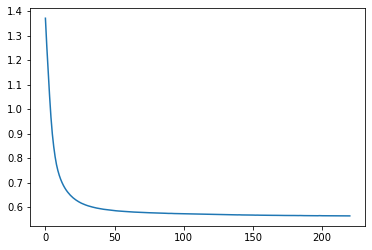

In [76]:
import matplotlib.pyplot as plt

plt.plot(pipeline.steps[0][1].loss_curve_)
plt.show()

In [21]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import manhattan_distances,euclidean_distances
gmm = GaussianMixture(3, covariance_type='full', random_state=40).fit(X_train)
dist_to_means_df=pd.DataFrame()
for i in range(gmm.means_.shape[0]):
    cluster_mean = gmm.means_[i].reshape(gmm.means_.transpose().shape[0],1)
    cluster_mean = cluster_mean.transpose()
    dist = euclidean_distances(X_train,cluster_mean)
    dist_to_means_df.insert(loc=i,
          column='Distance_'+str(i),
          value=dist[:,0])
X_gmm_train = dist_to_means_df
y_gmm_train=y_train
print(X_gmm_train.shape)
print(y_gmm_train.shape)

dist_to_means_test_df=pd.DataFrame()
for i in range(gmm.means_.shape[0]):
    cluster_mean = gmm.means_[i].reshape(gmm.means_.transpose().shape[0],1)
    cluster_mean = cluster_mean.transpose()
    dist = euclidean_distances(X_test,cluster_mean)
    dist_to_means_test_df.insert(loc=i,
          column='Distance_'+str(i),
          value=dist[:,0])

X_gmm_test = dist_to_means_test_df
y_gmm_test=y_test
print(X_gmm_test.shape)
print(y_gmm_test.shape)

s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)

(12702, 3)
(12702,)
(5445, 3)
(5445,)


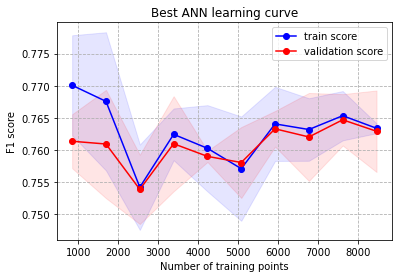

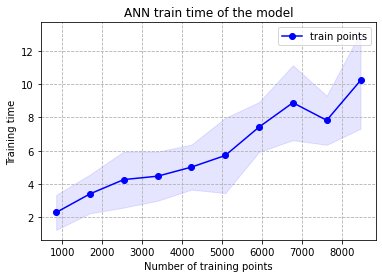

ANN: Predict Time= 0.004
ANN: F1 score= 0.756
              precision    recall  f1-score   support

           0       0.60      0.59      0.59      1025
           1       0.79      0.83      0.81      1760
           2       1.00      1.00      1.00       608
           3       0.63      0.62      0.62      2052

    accuracy                           0.72      5445
   macro avg       0.76      0.76      0.76      5445
weighted avg       0.72      0.72      0.72      5445

[[ 600    0    0  425]
 [   0 1454    0  306]
 [   0    1  607    0]
 [ 399  390    0 1263]]


In [22]:
from sklearn.neural_network import MLPClassifier
gmm_euc_pipeline = make_pipeline(MLPClassifier(alpha=0.3,random_state=40, max_iter=500, learning_rate='constant',solver='adam',hidden_layer_sizes=(15,)))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=gmm_euc_pipeline, X=X_gmm_train, y=y_gmm_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Best ANN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'ANN train time of the model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
gmm_euc_pipeline.fit(X_gmm_train, y_gmm_train)

# calculate f1 score
import time
start = time.time()
y_pred = gmm_euc_pipeline.predict(X_gmm_test)
diff=time.time() - start
print('ANN: Predict Time= %.3f' %  diff)
# summarize scores
print('ANN: F1 score= %.3f' %  f1_score(y_gmm_test, y_pred, average="macro"))
print(classification_report(y_gmm_test, y_pred))
print(confusion_matrix(y_gmm_test, y_pred))

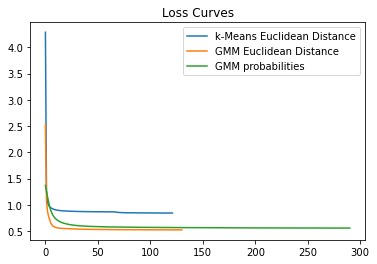

In [26]:
import matplotlib.pyplot as plt
# plotting the nn losses against the value of k
plt.plot(k_means_pipeline.steps[0][1].loss_curve_,  label='k-Means Euclidean Distance')
plt.plot(gmm_euc_pipeline.steps[0][1].loss_curve_,  label='GMM Euclidean Distance')
plt.plot(gmm_pipeline.steps[0][1].loss_curve_ , label='GMM probabilities')
plt.title('Loss Curves')
plt.legend(loc=1)
plt.show()